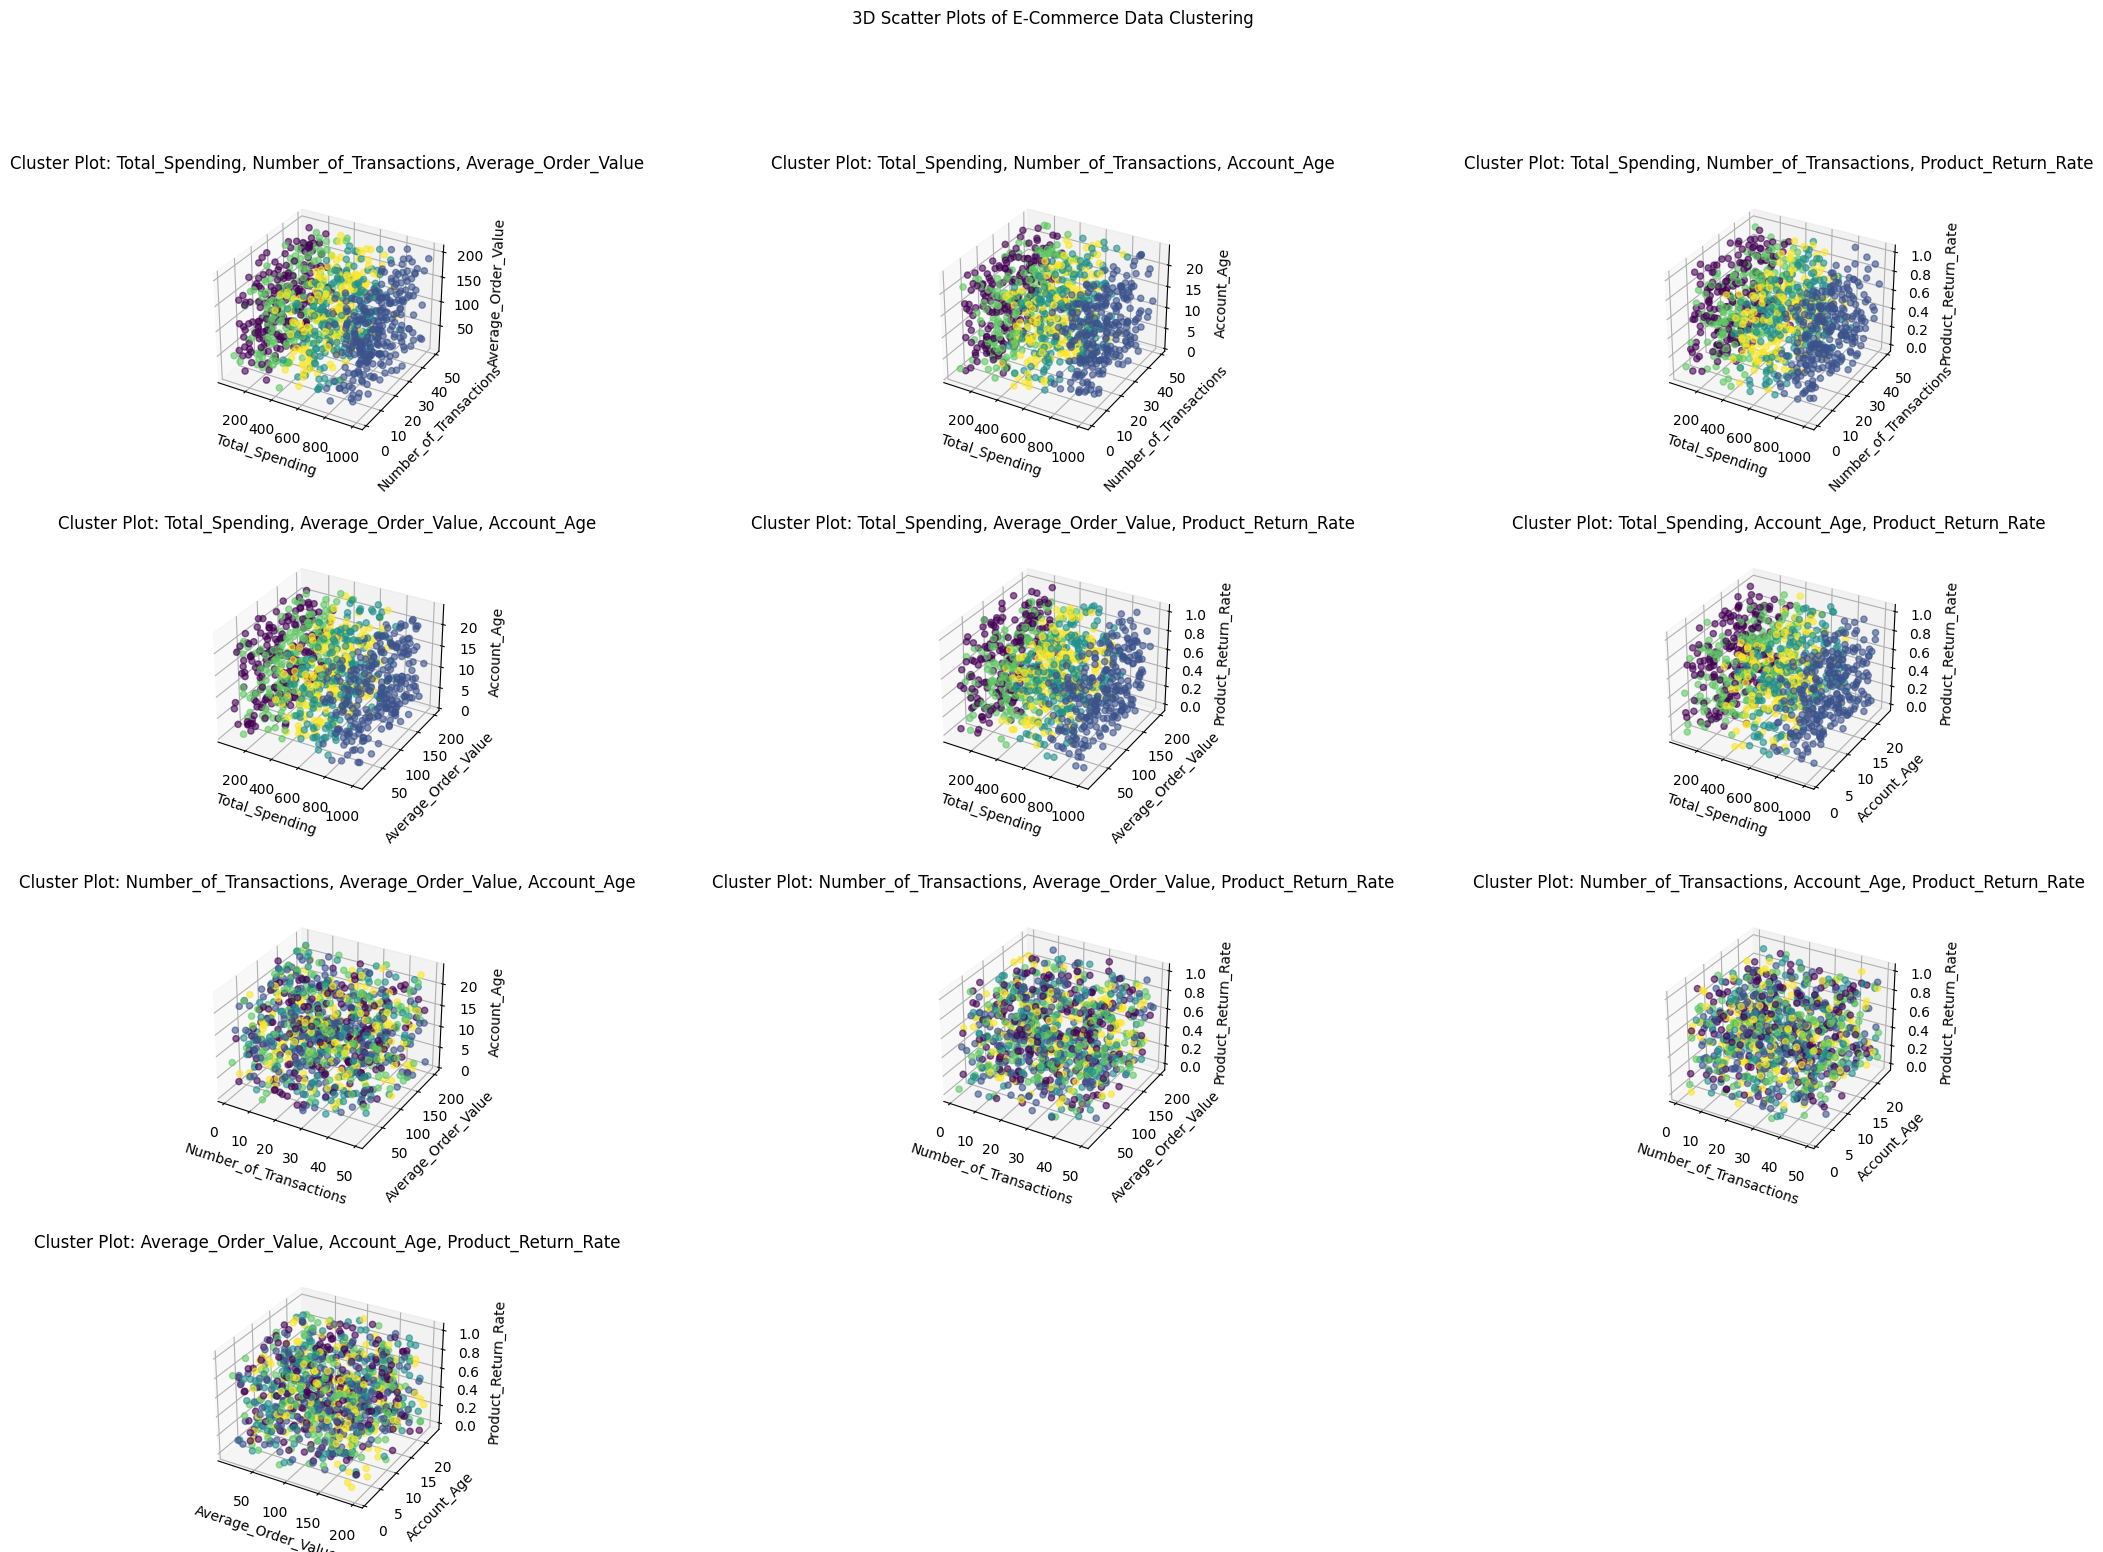

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from itertools import combinations

np.random.seed(42)
n_samples = 1000

data = {
    'Total_Spending': np.random.uniform(50, 1000, n_samples),
    'Number_of_Transactions': np.random.randint(1, 50, n_samples),
    'Average_Order_Value': np.random.uniform(10, 200, n_samples),
    'Account_Age': np.random.randint(1, 24, n_samples),
    'Product_Return_Rate': np.random.uniform(0, 1, n_samples),
    'Discount_Usage': np.random.randint(0, 10, n_samples),
    'Last_Purchase_Days': np.random.randint(1, 365, n_samples),
    'Browsing_Time': np.random.uniform(1, 300, n_samples),
    'Cart_Abandonment_Rate': np.random.uniform(0, 1, n_samples),
    'Loyalty_Points': np.random.randint(0, 500, n_samples),
}

df = pd.DataFrame(data)

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df)

features = [
    'Total_Spending',
    'Number_of_Transactions',
    'Average_Order_Value',
    'Account_Age',
    'Product_Return_Rate',
]

feature_combinations = list(combinations(features, 3))

num_plots = len(feature_combinations)
fig = plt.figure(figsize=(20, 15))

ncols = 3
nrows = (num_plots + ncols - 1) // ncols

for idx, (f1, f2, f3) in enumerate(feature_combinations):
    ax = fig.add_subplot(nrows, ncols, idx + 1, projection='3d')
    ax.scatter(df[f1], df[f2], df[f3], c=df['Cluster'], cmap='viridis', alpha=0.6)
    ax.set_xlabel(f1)
    ax.set_ylabel(f2)
    ax.set_zlabel(f3)
    ax.set_title(f'Cluster Plot: {f1}, {f2}, {f3}', pad=15)

plt.tight_layout()
plt.subplots_adjust(top=0.90, hspace=0.4, wspace=0.4)
plt.suptitle('3D Scatter Plots of E-Commerce Data Clustering', y=1.02)
plt.show()
